In [ ]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import os

from tensorflow.keras.models import load_model, Model

In [ ]:
# Cifar10 has 10 classes
N_CLASSES = 10
# our input dimensions
INSHAPE = 32, 32, 3

In [ ]:
# get the data
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
# do a 1hot encoding on labels
Y_train = tf.keras.utils.to_categorical(y_train, N_CLASSES)
Y_test = tf.keras.utils.to_categorical(y_test, N_CLASSES)

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
tf.keras.backend.clear_session()
# Load the model from disk
model = load_model(os.path.join('models','squeezeNet_cifar10.h5'))

# Evaluate the model
test_res = model.evaluate(x_test , Y_test)

# Print the results as a dictionary {<metric name>: <value>}
test_res_dict = dict(zip(model.metrics_names, test_res))
print(test_res_dict)

313/313 [==============================] - 11s 33ms/step - loss: 1.4246 - accuracy: 0.4688
{'loss': 1.4246349334716797, 'accuracy': 0.46880000829696655}


Confusion matrix, without normalization
[[365  58  34  22  19  11  24  43 297 127]
 [ 12 592   0  10   2   8  19  17  33 307]
 [ 66  22  88 103 189 132 177 132  60  31]
 [ 14  20  25 273  28 288 161 107  24  60]
 [ 39  11  21  64 287  92 192 227  38  29]
 [  9  12  20 151  32 482  77 171  21  25]
 [  4  13  13 127 125  46 571  45  15  41]
 [ 14  13   3  51  31 136  22 655  13  62]
 [ 64  84   6  35   2   8  12   5 662 122]
 [ 12 130   0  16   4   4  20  46  55 713]]


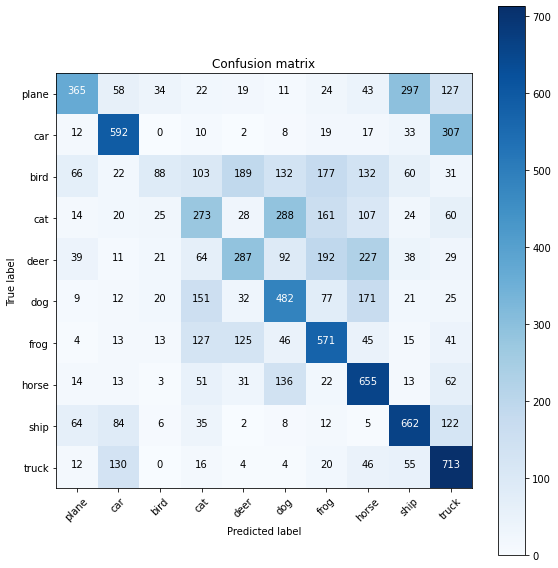

In [ ]:
# Plot confusion matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)
  figure = plt.figure(1, figsize= (8, 8))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  labels = ['plane', 'car', 'bird','cat','deer','dog','frog','horse','ship','truck']
  plt.yticks(np.arange(len(labels)), labels)
  plt.xticks(np.arange(len(labels)), labels)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  figure.savefig("squeezeNet_confmat.pdf", bbox_inches='tight')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# TinyIageNet has 200 classes
N_CLASSES = 200
# our input dimensions
INSHAPE = 64, 64, 3
PICTURE_SHAPE = INSHAPE[0], INSHAPE[1]

In [ ]:
# download tiny Imagenet and create folder
import os
import requests
import zipfile

# Retrieve the data
if not os.path.exists(os.path.join('data','tiny-imagenet-200.zip')):
    url = "http://cs231n.stanford.edu/tiny-imagenet-200.zip"
    # Get the file from web
    r = requests.get(url)

    if not os.path.exists('data'):
        os.mkdir('data')
    
  # Write to a file
    with open(os.path.join('data','tiny-imagenet-200.zip'), 'wb') as f:
        f.write(r.content)
else:
      print("The zip file already exists.")
    
if not os.path.exists(os.path.join('data', 'tiny-imagenet-200')):
    with zipfile.ZipFile(os.path.join('data','tiny-imagenet-200.zip'), 'r') as zip_ref:
        zip_ref.extractall('data')
else:
    print("The extracted data already exists")

In [ ]:
from functools import partial
import pickle
from keras.preprocessing.image import ImageDataGenerator

def get_test_labels_df(test_labels_path):
    """ Reading the test data labels for all files in the test set as a data frame """
    test_df = pd.read_csv(test_labels_path, sep='\t', index_col=None, header=None)
    test_df = test_df.iloc[:,[0,1]].rename({0:"filename", 1:"class"}, axis=1)
    return test_df

image_gen = ImageDataGenerator(samplewise_center=False)
test_df = get_test_labels_df('./data/tiny-imagenet-200/val/val_annotations.txt')
test_gen = image_gen.flow_from_dataframe(
    test_df, directory=os.path.join('./data/tiny-imagenet-200/val/images'), 
    target_size=PICTURE_SHAPE, classes=None,
    class_mode='categorical', shuffle=False,batch_size=10000
)

Found 10000 validated image filenames belonging to 200 classes.


In [ ]:
tf.keras.backend.clear_session()
# Load the model from disk
model = load_model(os.path.join('models','squeezeNet_tinyimageNet.h5'))

In [ ]:
# Evaluate the model
test_res = model.evaluate(test_gen)
# Print the results as a dictionary {<metric name>: <value>}
test_res_dict = dict(zip(model.metrics_names, test_res))
print(test_res_dict)

1/1 [==============================] - 37s 37s/step - loss: 4.2913 - accuracy: 0.0960
{'loss': 4.291287899017334, 'accuracy': 0.09600000083446503}


In [ ]:
test_gen[0]

Confusion matrix, without normalization
[[13  0  0 ...  0  0  0]
 [ 0  6  1 ...  0  0  0]
 [ 0  2  6 ...  0  0  0]
 ...
 [ 0  0  2 ...  1  7  0]
 [ 1  0  0 ...  1 16  0]
 [ 0  0  0 ...  0  0  0]]


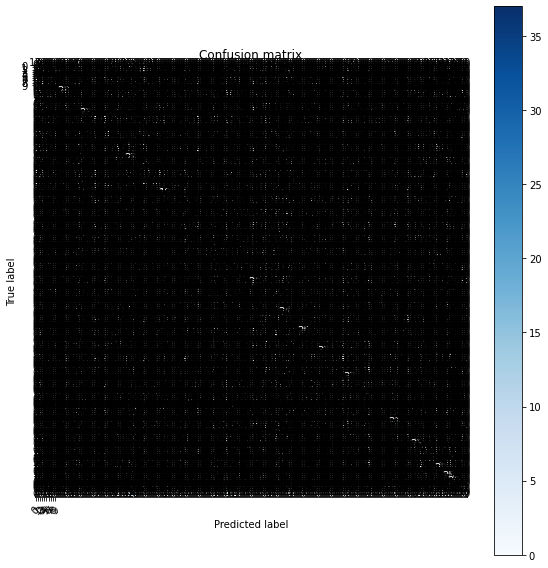

In [ ]:
# Plot confusion matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)
  figure = plt.figure(1, figsize= (8, 8))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  #labels = ['plane', 'car', 'bird','cat','deer','dog','frog','horse','ship','truck']
  #plt.yticks(np.arange(len(labels)), labels)
  #plt.xticks(np.arange(len(labels)), labels)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  #figure.savefig("squeezeNet_confmat.pdf", bbox_inches='tight')
  plt.show()


p_test = model.predict(test_gen[0][0]).argmax(axis=1)
cm = confusion_matrix(np.argmax(test_gen[0][1],axis=1), p_test)
plot_confusion_matrix(cm, list(range(10)))

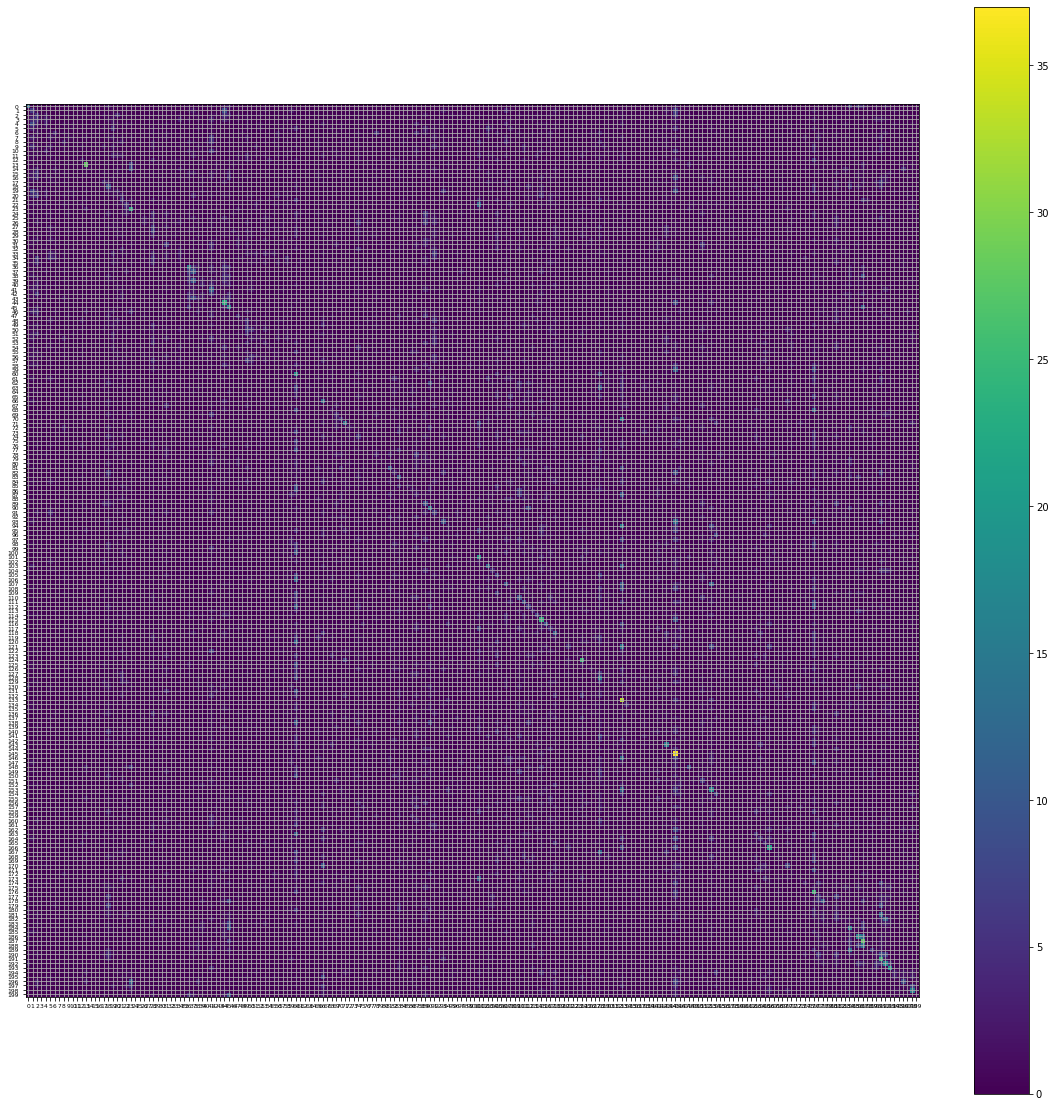

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
figure = plt.figure(1, figsize= (20, 20))
confmat=np.random.rand(200,200)
ticks=np.linspace(0, 199,num=200)
plt.imshow(cm, interpolation='none')
plt.colorbar()
plt.xticks(ticks,fontsize=6)
plt.yticks(ticks,fontsize=6)
plt.grid(True)
plt.show()